In [1]:
import numpy as np
import matplotlib.pyplot as plt

from nnfs.models import BaseModel
from nnfs.layers import LinearLayer
from nnfs.funcs import CrossEntropy
from nnfs.optimizers import SGD

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The classic example used for basic machine learning models is the MNIST dataset, which contains about 60,000 training examples of handwritten digits, with the goal of classifying the digit from the image. To note, the data used in this example is not included in the repository, but it is available [here](https://drive.google.com/file/d/11ZiNnV3YtpZ7d9afHZg0rtDRrmhha-1E/view). To run this next code block, place the data in `examples/data/mnist/` with the appropriate filenames.

The model will consider the vectorized form, that is, treating the 28x28 images as vectors of length 784 instead. As such, no convolutions will be required, but it will also lose access to any information gained from the 2D nature of the images.

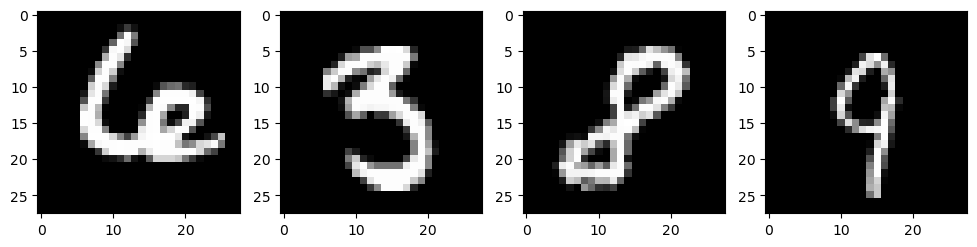

[6 3 8 9]


In [2]:
# Load datasets into numpy arrays
with open("data/mnist/train-images.idx3-ubyte", "rb") as file:
    train_image = np.frombuffer(file.read(), np.uint8, offset=16).reshape(-1, 28 * 28)
with open("data/mnist/t10k-images.idx3-ubyte", "rb") as file:
    test_image = np.frombuffer(file.read(), np.uint8, offset=16).reshape(-1, 28 * 28)

with open("data/mnist/train-labels.idx1-ubyte", "rb") as file:
    train_labels = np.frombuffer(file.read(), np.uint8, offset=8)
with open("data/mnist/t10k-labels.idx1-ubyte", "rb") as file:
    test_labels = np.frombuffer(file.read(), np.uint8, offset=8)


def draw_mnist_num(arr):
    """Helper function to draw MNIST numbers"""
    # Number of graphs
    nums = arr.shape[0]

    # Loop and graph
    fig, axes = plt.subplots(1, nums)
    for i in range(nums):
        axes[i].imshow(arr[i].reshape(28, 28), cmap="gray")
    fig.set_size_inches(3 * nums, 3)
    plt.show()

# Confirm images and labels are aligned
rand_inds = np.random.choice(train_image.shape[0], 4, replace = False)
draw_mnist_num(train_image[rand_inds])
print(train_labels[rand_inds])

# Adjust labels to correspond to class output
train_label_arr = np.zeros((train_labels.shape[0], 10), dtype=int)
train_label_arr[np.arange(train_labels.shape[0]), train_labels] = 1
test_label_arr = np.zeros((test_labels.shape[0], 10), dtype=int)
test_label_arr[np.arange(test_labels.shape[0]), test_labels] = 1

# Convert from (0, 255) to (0, 1) range
train_image = train_image.copy() / 256
test_image = test_image.copy() / 256

The example model is a two layer model, using 128 nodes in the first layer, and 10 nodes for the output layer. This is small enough (0.4 MB) to easily fit on any computer and can be trained without the use of a GPU. That being said, a more complex model (i.e, more layers or more parameters) will be more accurate but will require more time or processing power to train.

In [3]:
# Set up model with two layers
layers = [
    LinearLayer((784), (128)),
    LinearLayer((128), (10))
]

# Train model
model = BaseModel(layers, optimizer = SGD(learning_rate = 3.0))
model.train(
    [train_image, train_label_arr],
    [test_image, test_label_arr],
    CrossEntropy(),
    batch_size = 64,
    epochs = 20,
    full_test = True
)

Initialized model with 101770 parameters (0.4 MB).
Start of Epoch 1:


100%|██████████| 937/937 [00:32<00:00, 28.95it/s] 


Average loss at epoch 1: 8.70117
Start of Epoch 2:


100%|██████████| 937/937 [00:36<00:00, 26.00it/s] 


Average loss at epoch 2: 7.22876
Start of Epoch 3:


100%|██████████| 937/937 [00:34<00:00, 26.94it/s] 


Average loss at epoch 3: 7.14662
Start of Epoch 4:


100%|██████████| 937/937 [00:33<00:00, 27.73it/s] 


Average loss at epoch 4: 6.53114
Start of Epoch 5:


100%|██████████| 937/937 [00:35<00:00, 26.44it/s] 


Average loss at epoch 5: 5.71959
Start of Epoch 6:


100%|██████████| 937/937 [00:35<00:00, 26.09it/s] 


Average loss at epoch 6: 5.70459
Start of Epoch 7:


100%|██████████| 937/937 [00:37<00:00, 24.71it/s] 


Average loss at epoch 7: 5.72728
Start of Epoch 8:


100%|██████████| 937/937 [00:36<00:00, 25.37it/s]


Average loss at epoch 8: 5.73929
Start of Epoch 9:


100%|██████████| 937/937 [00:40<00:00, 23.25it/s]


Average loss at epoch 9: 5.68219
Start of Epoch 10:


100%|██████████| 937/937 [00:36<00:00, 25.73it/s] 


Average loss at epoch 10: 5.71883
Start of Epoch 11:


100%|██████████| 937/937 [00:35<00:00, 26.76it/s] 


Average loss at epoch 11: 5.76691
Start of Epoch 12:


100%|██████████| 937/937 [00:35<00:00, 26.59it/s] 


Average loss at epoch 12: 5.76627
Start of Epoch 13:


100%|██████████| 937/937 [00:35<00:00, 26.26it/s]


Average loss at epoch 13: 5.75877
Start of Epoch 14:


100%|██████████| 937/937 [00:36<00:00, 25.92it/s] 


Average loss at epoch 14: 5.72261
Start of Epoch 15:


100%|██████████| 937/937 [00:34<00:00, 27.02it/s] 


Average loss at epoch 15: 5.70959
Start of Epoch 16:


100%|██████████| 937/937 [00:33<00:00, 27.65it/s] 


Average loss at epoch 16: 5.65395
Start of Epoch 17:


100%|██████████| 937/937 [00:34<00:00, 27.27it/s] 


Average loss at epoch 17: 5.68207
Start of Epoch 18:


100%|██████████| 937/937 [00:34<00:00, 27.55it/s] 


Average loss at epoch 18: 5.64881
Start of Epoch 19:


100%|██████████| 937/937 [00:36<00:00, 25.41it/s]


Average loss at epoch 19: 5.63040
Start of Epoch 20:


100%|██████████| 937/937 [00:34<00:00, 27.01it/s] 


Average loss at epoch 20: 5.63526
Training took  0h 12m 54s.


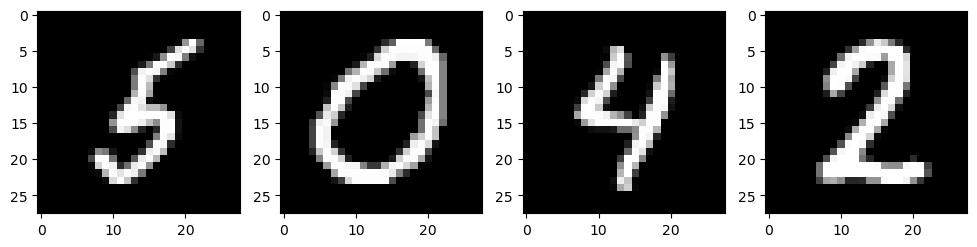

Model Guess: [5 0 4 2]
Actual Values: [5 0 4 2]
The model accuracy over the entire test set is 68.03%.


In [5]:
# Check if model can accurately label images
rand_inds = np.random.choice(train_image.shape[0], 4, replace = False)
draw_mnist_num(train_image[rand_inds])
model_guess = np.argmax(model.forward(train_image[rand_inds]), axis=1)
actual_val = train_labels[rand_inds]
print(f"Model Guess: {model_guess}")
print(f"Actual Values: {actual_val}")

# Find percent accuracy over entire test set
test_vals = model.forward(test_image)
test_accuracy = np.count_nonzero(np.argmax(test_vals, axis=1) == test_labels) / test_image.shape[0]
print(f"The model accuracy over the entire test set is {100 * test_accuracy:.2f}%.")

As shown, the model doesn't have a great accuracy, but for the simplicity and training time, 68% accuracy is quite good. More training time or model complexity would likely increase the accuracy.